In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

df_train = pd.read_csv("/data_fae_uq/rsna_boneage/train_annotations.csv")
df_val = pd.read_csv("/data_fae_uq/rsna_boneage/val_annotations.csv")
df_test = pd.read_csv("/data_fae_uq/rsna_boneage/test_annotations.csv")

for df in [df_train, df_val, df_test]:
    df["sex"] = df.apply(lambda row: "M" if row[["male"]].bool() else "F", axis=1)
    df["age_years"] = df["boneage"] / 12

df_all = pd.concat([df_train, df_val, df_test])
genders = sorted(list(df_all.sex.unique()))
df_all[["id", "boneage", "age_years", "sex"]]


,id,boneage,age_years,sex
0,1379,94,7.833333,F
1,1380,120,10.000000,M
2,1381,82,6.833333,F
3,1387,138,11.500000,M
4,1388,126,10.500000,F
...,...,...,...,...
1229,15500,180,15.000000,F
1230,15510,120,10.000000,M
1231,15525,168,14.000000,M
1232,15527,82,6.833333,F


## Unbalanced Raw (Full) Dataset

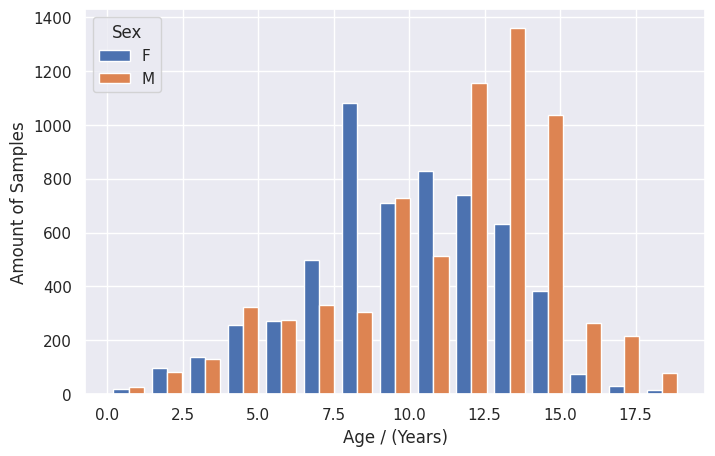

In [2]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.hist(
    [df_all.loc[df_all.sex == x, "age_years"] for x in genders],
    label=genders,
    bins=15,
)
ax.set_xlabel("Age / (Years)")
ax.set_ylabel("Amount of Samples")
ax.legend(title="Sex", loc="upper left")
fig.show()


## Unbalanced Train Dataset

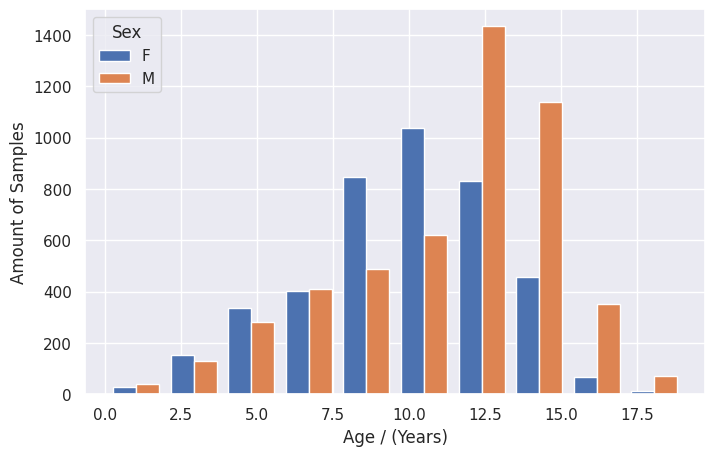

In [3]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.hist(
    [df_train.loc[df_train.sex == x, "age_years"] for x in genders],
    label=genders,
    bins=10,
)
ax.set_xlabel("Age / (Years)")
ax.set_ylabel("Amount of Samples")
ax.legend(title="Sex", loc="upper left")
ax.set_ylim(top=1500)
fig.show()


## Rebalanced Train Dataset

New Data Size: 22000 Old Size: 9135


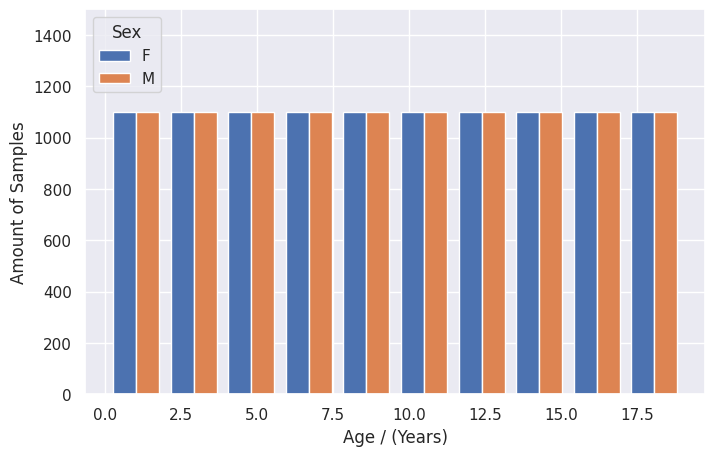

In [4]:
df_train["boneage_bin"] = pd.cut(df_train["boneage"], 10)
df_train_balanced = (
    df_train.groupby(["boneage_bin", "sex"])
    .apply(lambda x: x.sample(1100, replace=True))
    .reset_index(drop=True)
)

print("New Data Size:", df_train_balanced.shape[0], "Old Size:", df_train.shape[0])

fig, ax = plt.subplots(figsize=(8, 5))
ax.hist(
    [df_train_balanced.loc[df_train_balanced.sex == x, "age_years"] for x in genders],
    label=genders,
    bins=10,
)
ax.set_xlabel("Age / (Years)")
ax.set_ylabel("Amount of Samples")
ax.legend(title="Sex", loc="upper left")
ax.set_ylim(top=1500)
fig.show()
